In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size = 100)

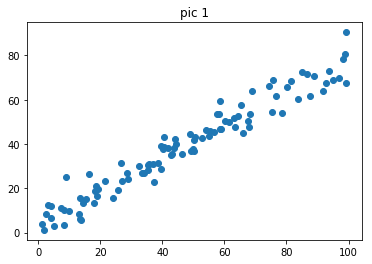

In [8]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("pic 1")
plt.show()

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)
pca.fit(X) 
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

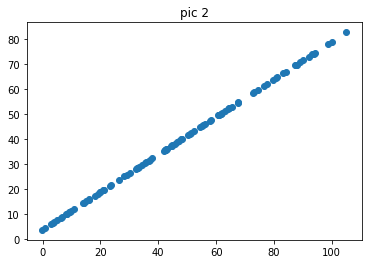

In [10]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.title("pic 2")
plt.show()

### 对比：
1. 不能说pic 2完全没有噪音
2. 不能说pic 1所有抖动都是噪音
3. 而是说，从pic 1到pic 2丢失了信息，这个信息可能它很大的一部分是噪音。

## 手写识别

In [11]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

### 每个数字都选10个样本

In [12]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)
example_digits = noisy_digits[y == 0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y == num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [13]:
example_digits.shape

(100, 64)

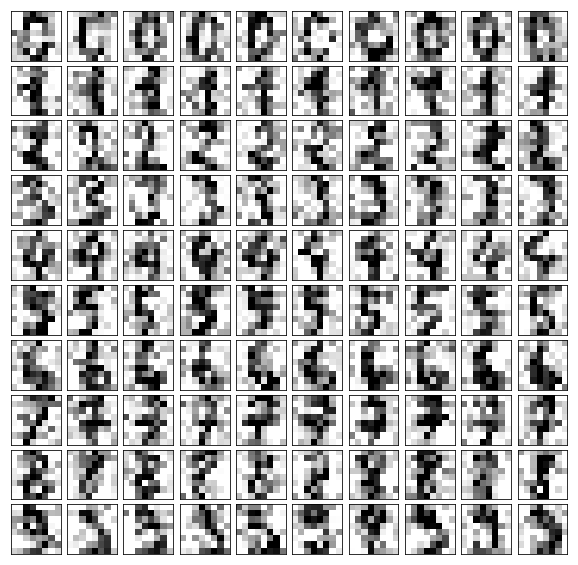

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize = (10,10),
                           subplot_kw = {'xticks':[], 'yticks':[]},
                           gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap = 'binary', 
                  interpolation = 'nearest',
                  clim = (0,16)) 
    plt.show()
    
plot_digits(example_digits)
        

In [29]:
pca = PCA(0.5) #只保留之前的前50%的信息，因为我认为噪音比较大，因为图像非常不清楚
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.n_components_

12

In [31]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

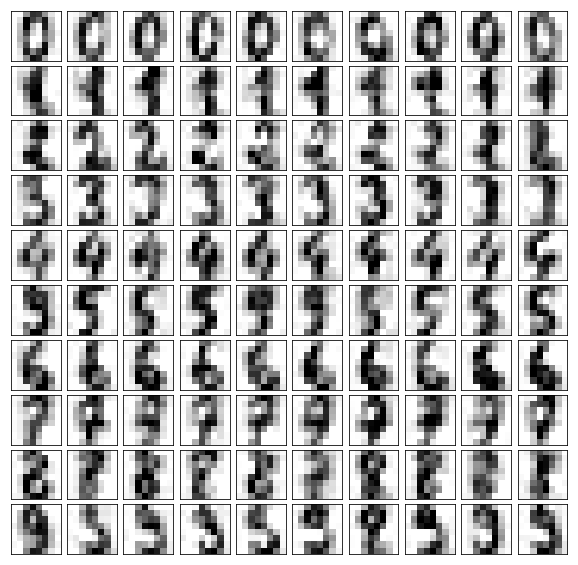

In [32]:
plot_digits(filtered_digits)